# Linear Regression

> Predicted value is continuous
> ex. for house prices, weather, stock price

In [ ]:
#| default_exp linearregression

In [ ]:
#| eval: false
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
#| eval: false
path = Path('Data/homeprices.csv')
df = pd.read_csv(path)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


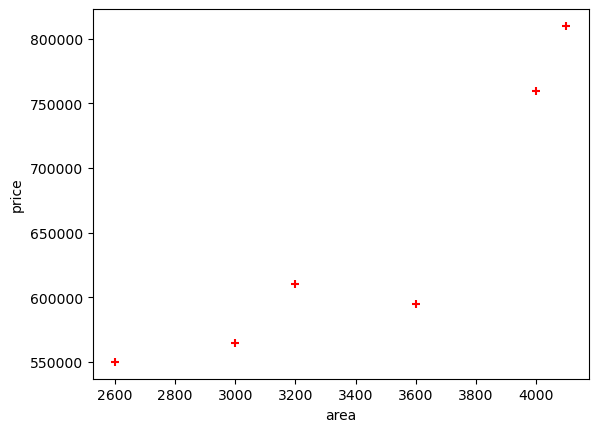

In [ ]:
#| eval: false
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

plt.show()

In [ ]:
#| eval: false
new_df = df.drop('price',axis='columns')
new_df = new_df.drop('bedrooms',axis='columns')
new_df = new_df.drop('age',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4100


In [ ]:
#| eval: false
price = df.price
price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [ ]:
#| eval: false
from sklearn import linear_model

In [ ]:
#| eval: false
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:
#| eval: false
reg.predict([[3300]])

/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628813.88621022])

In [ ]:
#| eval: false
reg.coef_

array([167.30954677])

In [ ]:
#| eval: false
reg.intercept_

76692.3818707813

Y = m * X + b (m is coefficient and b is intercept)

In [ ]:
#| eval: false
5000*reg.coef_ + reg.intercept_

array([913240.11571842])

In [ ]:
#| eval: false
reg.predict([[5000]])

/home/ben/mambaforge/envs/cfast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([913240.11571842])

## Generate CSV file with list of home price predictions

# Create a list of numbers from 1000 to 5000 with 500 increments

In [ ]:
#| eval: false
numbers_list = list(range(2000, 4000, 500))

In [ ]:
#| eval: false
# Create a DataFrame using the pandas constructor and a dictionary
data = {'area': numbers_list}
area_df = pd.DataFrame(data)
area_df

,area
0,2000
1,2500
2,3000
3,3500


In [ ]:
#| eval: false
p = reg.predict(area_df)
p

array([411311.47540984, 494966.2487946 , 578621.02217936, 662275.79556413])

In [ ]:
#| eval: false
area_df['prices']=p
area_df

,area,prices
0,2000,411311.475410
1,2500,494966.248795
2,3000,578621.022179
3,3500,662275.795564


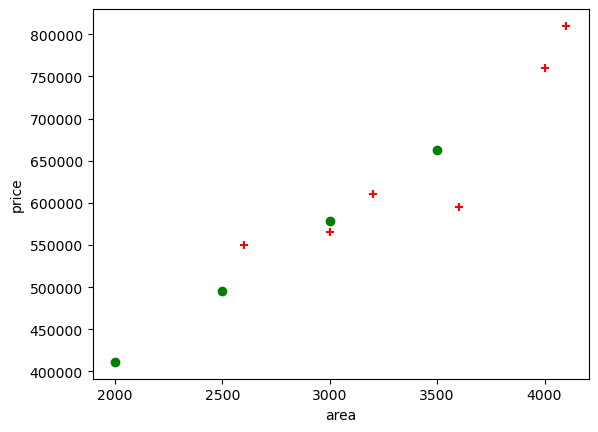

In [ ]:
#| eval: false
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,
            df.price,
            color='red',
            marker='+')

plt.scatter(area_df.area,
            area_df.prices,
            color='green',
            marker='o')

plt.show()

In [ ]:
#| eval: false
area_df.to_csv("./Data/prediction.csv")